In [1]:
import pandas as pd
import numpy as np
from bookgender.config import data_dir
from bookgender.nbutils import *
import plotnine as p9
import plotnine.data as p9d
from itertools import product
import math
import matplotlib as plt
from pylab import figure, text, scatter, plt
import seaborn as sns
from plotnine import *

In [2]:
def add_arrow(system_name):
    if  system_name == 'EER' or system_name == 'FAIR':
        #print(system_name)
        return system_name+'\u2191'
    elif system_name == 'EEL' or system_name == 'IAA' or system_name == 'EED' or system_name == 'AWRF' or system_name == 'AWRF_equal':
        return system_name+'\u2193'
    elif system_name == 'logDP' or system_name == 'logEUR' or system_name == 'logRUR':
        return system_name+'\u2022'

In [3]:
def default_score(df_default, savefile, ft='ret'):
    
    df = df_default.loc[df_default['Metric']!='AWRF_equal']
    df['Metric']= df['Metric'].apply(lambda x: add_arrow(x))
    pw_metrics = df['Metric'].unique()
    
    #pw_weights = default_results['ranked_size'].unique()
    try:
        algos = np.unique(df['system'])
        if ft == 'rerank':
            #print(ft)
            flatui = ["#8c510a", "#bf812d", "#dfc27d", "#5ab4ac", "#01665e"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
        else:
            flatui = ["#b2182b", "#ef8a62", "#d1e5f0", "#67a9cf", "#2166ac"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
            
    except:
        algos = np.unique(df['Algorithm'])
        flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71", "#95a5a6"]
        pal1 = (sns.color_palette(flatui))
        sns.set_palette(pal1)
        

    #nr = len(pw_weights)
    nc = len(pw_metrics)
    na = len(algos)
    fig, axs = plt.subplots(ncols=nc, figsize=(15, 2.3))
    
    for r, w in enumerate(pw_metrics):

        row_df = df[df['Metric'] == w]
        ax = axs[r]
        #axs.style.use('seaborn-dark-palette')
        for x, a in enumerate(algos):
            try:
                ax.bar(a, row_df.loc[row_df['system'] == a, 'value'])#, color = color[x])
            except:
                ax.bar(a, row_df.loc[row_df['Algorithm'] == a, 'value'])
                
            ax.get_xaxis().set_visible(False)
            ax.set_title(w)
        #ax.plot(pw_weights,  , label=algos)
        if r==0:
            ax.set_ylabel('Metric Score')
    
    #plt.figlegend(algos, loc='upper left', ncol=na, bbox_to_anchor=(0.35, -0.01))
    plt.tight_layout()
    plt.savefig(savefile, bbox_inches='tight')
    return plt

In [4]:
def show_parameter(df, parameter, xlabel, savefile, ft='ret'):
    
    final_parameter_metric = df.loc[df['Metric']!='AWRF_equal']
    final_parameter_metric['Metric']= final_parameter_metric['Metric'].apply(lambda x: add_arrow(x))
    pw_metrics = final_parameter_metric['Metric'].unique()
    pw_weights = final_parameter_metric['pos_weight'].unique()
    try:
        algos = np.unique(final_parameter_metric['Algorithm'])
        flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71", "#95a5a6"]
        pal1 = (sns.color_palette(flatui))
        sns.set_palette(pal1)
        
    except:
        algos = np.unique(final_parameter_metric['system'])
        if ft == 'rerank':
            flatui = ["#8c510a", "#bf812d", "#dfc27d", "#5ab4ac", "#01665e"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
            
        else:
            flatui = ["#b2182b", "#ef8a62", "#d1e5f0", "#67a9cf", "#2166ac"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
            

    nr = len(pw_weights)
    nc = len(pw_metrics)
    na = len(algos)
    fig, axs = plt.subplots(nr, nc, figsize=(13.5, 5))

    for r, w in enumerate(pw_weights):
        row_df = final_parameter_metric[final_parameter_metric['pos_weight'] == w]
        for c, m in enumerate(pw_metrics):
            cell_df = row_df[row_df['Metric'] == m]
            ax = axs[r][c]
            for x, a in enumerate(algos):
                try:
                    
                    ax.plot(cell_df.loc[cell_df['Algorithm'] == a, parameter], 
                            cell_df.loc[cell_df['Algorithm'] == a, 'value'], label=a)
                except:
                    ax.plot(cell_df.loc[cell_df['system'] == a, parameter], 
                            cell_df.loc[cell_df['system'] == a, 'value'], label=a)
    #         ax.set_xticks(np.arange(na))
    #         ax.set_xticklabels([])
            #ax.get_xaxis().set_visible(False)
            #ax.set_xticklabels(ax.get_xticks(), rotation = 45)
            if r == 0:
                ax.set_title(m)
            if c == 0:
                #ax.set_xlabel('Stoping Probability', ha='center', va = 'top')
                ax.set_ylabel(w)
            if r==len(pw_weights)-1 and c==2:
                ax.set_xlabel(xlabel, ha='center', va = 'top') 

    #plt.figlegend(algos, loc='center left', ncol=na, bbox_to_anchor=(0.5, -0.0000001), title='Algorithm')
    plt.tight_layout()
    plt.savefig(savefile, bbox_inches='tight')
    plt.show()

In [5]:
def show_pos(df, savefile, ft='ret'):
    
    df = df.loc[df['Metric']!='AWRF_equal']
    df['Metric']= df['Metric'].apply(lambda x: add_arrow(x))
    
    pw_metrics = df['Metric'].unique()
    pw_weights = df['pos_weight'].unique()
    try:
        algos = np.unique(df['system'])
        
        if ft == 'rerank':
            flatui = ["#8c510a", "#bf812d", "#dfc27d", "#5ab4ac", "#01665e"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
            
        else:
            flatui = ["#b2182b", "#ef8a62", "#d1e5f0", "#67a9cf", "#2166ac"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
            
    except:
        algos = np.unique(df['Algorithm'])
        flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71", "#95a5a6"]
        pal1 = (sns.color_palette(flatui))
        sns.set_palette(pal1)
        

    nr = len(pw_weights)
    nc = len(pw_metrics)
    na = len(algos)
    fig, axs = plt.subplots(nr, nc, figsize=(12, 4))

    for r, w in enumerate(pw_weights):
        row_df = df[df['pos_weight'] == w]
        for c, m in enumerate(pw_metrics):
            cell_df = row_df[row_df['Metric'] == m]
            ax = axs[r][c]
            for x, a in enumerate(algos):
                try:
                    ax.bar(x, cell_df.loc[cell_df['system'] == a, 'value'], label=a)
                except:
                    ax.bar(x, cell_df.loc[cell_df['Algorithm'] == a, 'value'], label=a)
                
    #         ax.set_xticks(np.arange(na))
    #         ax.set_xticklabels([])
            ax.get_xaxis().set_visible(False)
            if r == 0:
                ax.set_title(m)
            if c == 0:
                ax.set_ylabel(w)

    #plt.figlegend(algos, loc='lower center', ncol=na, bbox_to_anchor=(0.5, -0.05))
    plt.tight_layout()
    plt.savefig(savefile, bbox_inches='tight')
    return plt

In [6]:
#new_rankedlist_results=pd.read_parquet('results/rankedlist_sens.parquet')
def show_rankedsize(df, savefile, ft='ret'):
    new_rankedlist_results=df.loc[df['Metric']!='AWRF_equal']
    new_rankedlist_results['Metric']= new_rankedlist_results['Metric'].apply(lambda x: add_arrow(x))
    
    pw_metrics = new_rankedlist_results['Metric'].unique()
    pw_weights = new_rankedlist_results['ranked_size'].unique()
    try:
        algos = np.unique(df['system'])
        if ft == 'rerank':
            flatui = ["#8c510a", "#bf812d", "#dfc27d", "#5ab4ac", "#01665e"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
            
        else:
            flatui = ["#b2182b", "#ef8a62", "#d1e5f0", "#67a9cf", "#2166ac"]
            pal1 = (sns.color_palette(flatui))
            sns.set_palette(pal1)
            
    except:
        algos = np.unique(df['Algorithm'])
        flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71", "#95a5a6"]
        pal1 = (sns.color_palette(flatui))
        sns.set_palette(pal1)

    nr = len(pw_weights)
    nc = len(pw_metrics)
    na = len(algos)
    fig, axs = plt.subplots(ncols=nc, figsize=(13.5, 2))


    for r, w in enumerate(pw_metrics):
        row_df = new_rankedlist_results[new_rankedlist_results['Metric'] == w]
        ax = axs[r]
        for x, a in enumerate(algos):
            try:
                ax.plot(row_df.loc[row_df['Algorithm'] == a, 'ranked_size'], 
                        row_df.loc[row_df['Algorithm'] == a, 'value'], label=a)
            except:
                ax.plot(row_df.loc[row_df['system'] == a, 'ranked_size'], 
                        row_df.loc[row_df['system'] == a, 'value'], label=a)
            #ax.get_xaxis().set_visible(False)
            ax.set_title(w)
            ax.set_xscale('log')
            if r == 3:
                ax.set_xlabel('Ranking Length', ha='left', va = 'top')
            if r == 0:
                ax.set_ylabel('Metric Score')
                #ax.set_xscale('log')
                #ax.xaxis.set_label_coords(5.8, -0.5)
        #ax.set_xlabel('rankedlist size')
        #ax.plot(pw_weights,  , label=algos)

    #plt.figlegend(algos, loc='center', ncol=na, bbox_to_anchor=(0.5, -0.0000015), title='Algorithm')
    plt.tight_layout()
    plt.savefig(savefile, bbox_inches='tight')
    plt.show()

\u2191 --> up
\u2193 --> down

In [7]:
import warnings
warnings.filterwarnings('ignore')

## GoodReads Book Recommendations

### Default

In [8]:
default_recsys = pd.read_parquet('results/SIGIR22/rec_default_up.parquet')
default_recsys.head()

,Algorithm,Metric,value,ranked_size
0,bpr,AWRF_equal,0.393765,100
1,item-item,AWRF_equal,0.391799,100
2,user-user,AWRF_equal,0.378053,100
3,wrls,AWRF_equal,0.366965,100
4,bpr,FAIR,0.352792,100


<module 'matplotlib.pyplot' from '/home/AMIFARAJ/anaconda3/envs/bookfair/lib/python3.7/site-packages/matplotlib/pyplot.py'>

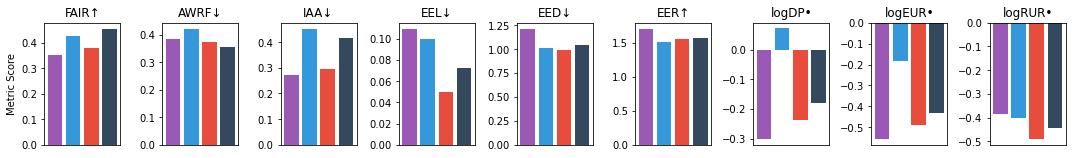

In [9]:
default_score(default_recsys, 'figures/publish/recsys_default.pdf')

### Sensitivity Analysis

### Ranked List Changing

In [10]:
ranked_size = pd.read_parquet('results/SIGIR22/rec_rankedlist_sens_size_up.parquet')
ranked_size.head()

,Algorithm,Metric,value,ranked_size
0,bpr,AWRF_equal,0.392382,10
1,item-item,AWRF_equal,0.391042,10
2,user-user,AWRF_equal,0.377818,10
3,wrls,AWRF_equal,0.366986,10
4,bpr,FAIR,0.491807,10


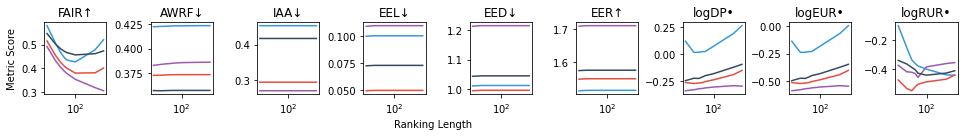

In [11]:
show_rankedsize(ranked_size, 'figures/publish/rec_rank_size.pdf')

### Position Weight Change

In [14]:
pos_weight = pd.read_parquet('results/SIGIR22/rec_position_sensitivity_up.parquet')
pos_weight.head()

,Algorithm,Metric,value,pos_weight
0,bpr,AWRF,0.385593,geometric
1,item-item,AWRF,0.423400,geometric
2,user-user,AWRF,0.373271,geometric
3,wrls,AWRF,0.357054,geometric
4,bpr,IAA,0.270639,geometric


<module 'matplotlib.pyplot' from '/home/AMIFARAJ/anaconda3/envs/bookfair/lib/python3.7/site-packages/matplotlib/pyplot.py'>

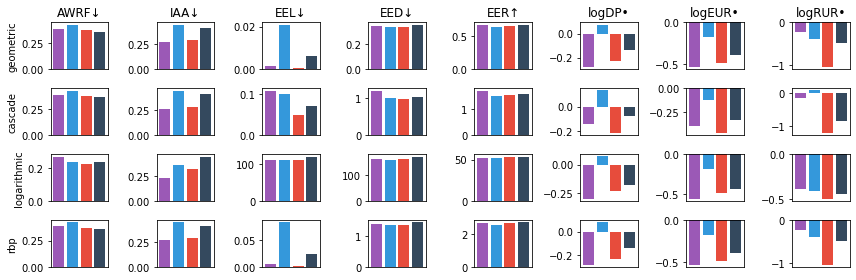

In [13]:
show_pos(pos_weight, 'figures/publish/rec_pos_weight.pdf')

### Parameters Changing

In [15]:
stop = pd.read_parquet('results/SIGIR22/rec_sensitivity_stop_up.parquet')
patience = pd.read_parquet('results/SIGIR22/rec_sensitivity_patience_up.parquet')

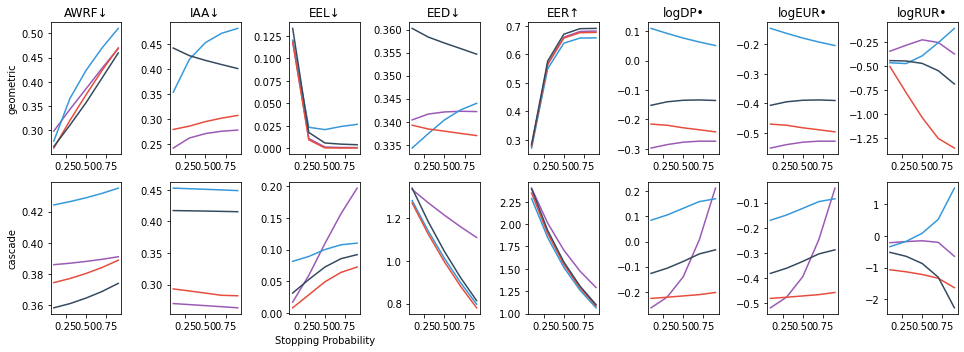

In [16]:
show_parameter(stop, 'stop', 'Stopping Probability', 'figures/publish/rec_stop_prob.pdf')

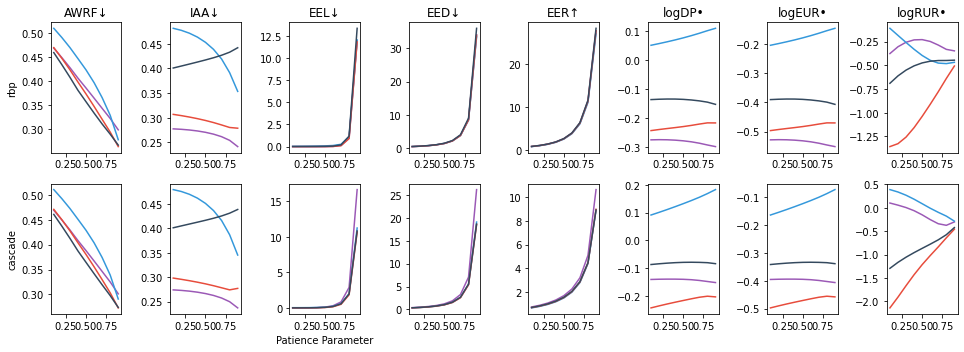

In [17]:
show_parameter(patience, 'patience', 'Patience Parameter', 'figures/publish/rec_patience_para.pdf')

## Fair Ranking Track 2020 (Reranking Task)

### Deafult setting

In [26]:
ft_rerank_default_results = pd.read_parquet('results/SIGIR22/rerank_soft_default_up.parquet')
ft_rerank_default_results.head(5)

,system,Metric,value,ranked_size
0,Deltr-gammas,AWRF_equal,0.413282,10
1,LM-rel-groups,AWRF_equal,0.401035,10
2,MacEwan-base,AWRF_equal,0.410881,10
3,UoGTrBComFu,AWRF_equal,0.381742,10
4,umd_relfair_ltr,AWRF_equal,0.412495,10


<module 'matplotlib.pyplot' from '/home/AMIFARAJ/anaconda3/envs/bookfair/lib/python3.7/site-packages/matplotlib/pyplot.py'>

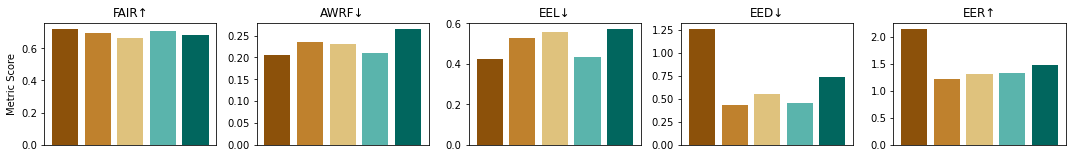

In [27]:
default_score(ft_rerank_default_results, 'figures/publish/ftrerank_default.pdf', ft ='rerank')

### Sensitivity Analysis

### Position Weight Change

In [28]:
ftrerank_position_results = pd.read_parquet('results/SIGIR22/fairrerank_sensitive_position_up.parquet')
ftrerank_position_results.head(5)

,system,Metric,value,pos_weight
0,Deltr-gammas,AWRF,0.211584,geometric
1,LM-rel-groups,AWRF,0.236611,geometric
2,MacEwan-base,AWRF,0.238134,geometric
3,UoGTrBComFu,AWRF,0.248278,geometric
4,umd_relfair_ltr,AWRF,0.265781,geometric


<module 'matplotlib.pyplot' from '/home/AMIFARAJ/anaconda3/envs/bookfair/lib/python3.7/site-packages/matplotlib/pyplot.py'>

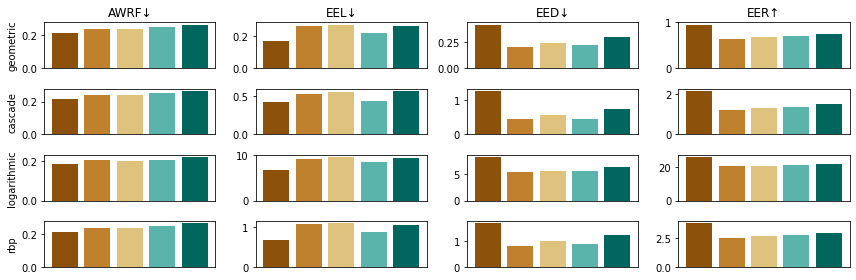

In [29]:
show_pos(ftrerank_position_results, 'figures/publish/ftrerank_position.pdf', ft="rerank")

### Parameter Changing

In [22]:
ftrerank_stop=pd.read_parquet('results/SIGIR22/fairrerank_sensitivity_stop_up.parquet')
ftrerank_stop.head(5)

,system,Metric,value,stop,pos_weight,ranked_size
0,Deltr-gammas,AWRF,0.179012,0.1,geometric,10
1,LM-rel-groups,AWRF,0.187474,0.1,geometric,10
2,MacEwan-base,AWRF,0.186874,0.1,geometric,10
3,UoGTrBComFu,AWRF,0.183553,0.1,geometric,10
4,umd_relfair_ltr,AWRF,0.192241,0.1,geometric,10


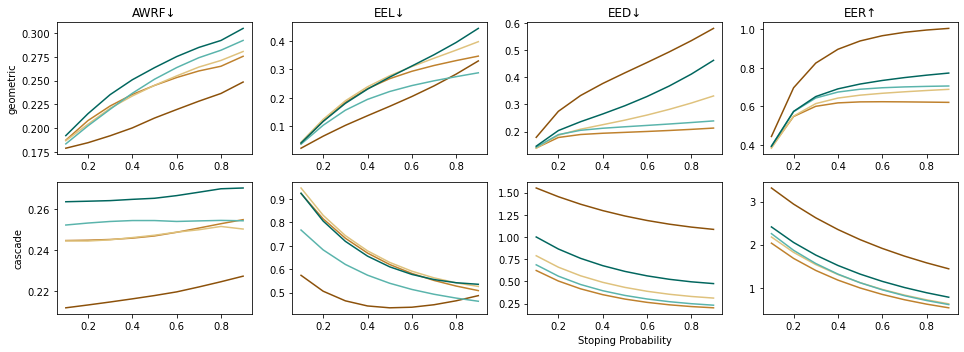

In [23]:
show_parameter(ftrerank_stop, 'stop',  'Stoping Probability', 'figures/publish/ftrerank_stop.pdf', ft="rerank")

In [24]:
ftrerank_patience=pd.read_parquet('results/SIGIR22/fairrerank_sensitivity_patience_up.parquet')
ftrerank_patience.head(5)

,system,Metric,value,patience,pos_weight,ranked_size
0,Deltr-gammas,AWRF,0.248494,0.1,rbp,10
1,LM-rel-groups,AWRF,0.275527,0.1,rbp,10
2,MacEwan-base,AWRF,0.280554,0.1,rbp,10
3,UoGTrBComFu,AWRF,0.292189,0.1,rbp,10
4,umd_relfair_ltr,AWRF,0.304823,0.1,rbp,10


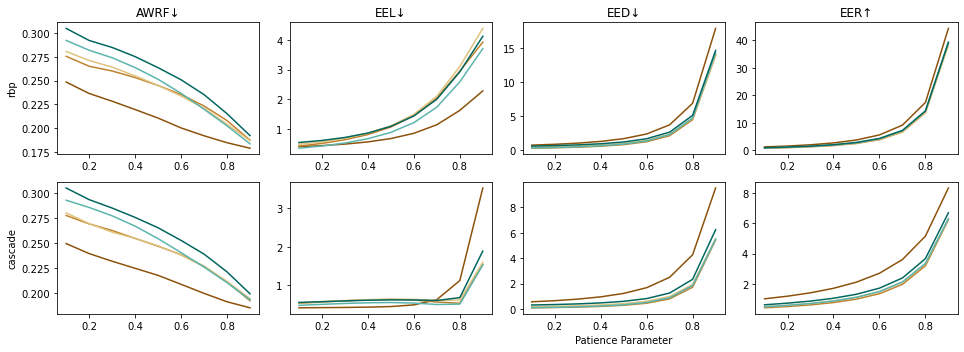

In [25]:
show_parameter(ftrerank_patience, 'patience', 'Patience Parameter', 'figures/publish/ftrerank_patience.pdf', ft="rerank")

## Fair Ranking Track 2020 (Retrieval Task)

### Default setting

In [27]:
ft_ret_default_results = pd.read_parquet('results/SIGIR22/retrieval_soft_default_up.parquet')
ft_ret_default_results.head(5)

,system,Metric,value,ranked_size
0,UW_Kt_r0g0c100,AWRF_equal,0.464469,100
1,UW_Kt_r25g25c50,AWRF_equal,0.434657,100
2,UW_Kt_r60g20c20,AWRF_equal,0.436589,100
3,UW_Kt_r80g10c10,AWRF_equal,0.432874,100
4,UW_t_bm25,AWRF_equal,0.435783,100


<module 'matplotlib.pyplot' from '/home/AMIFARAJ/anaconda3/envs/bookfair/lib/python3.7/site-packages/matplotlib/pyplot.py'>

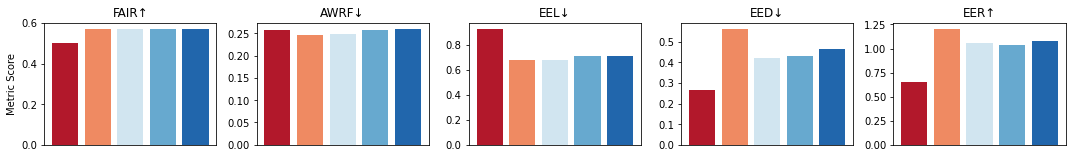

In [28]:
default_score(ft_ret_default_results, 'figures/publish/ftret_default.pdf')

### Sensitivity Analysis

### Ranked list size change

In [17]:
ftret_rankedlist_results = pd.read_parquet('results/SIGIR22/fair_rankedlist_sens_size_up.parquet')
ftret_rankedlist_results.head()

,system,Metric,value,ranked_size
0,UW_Kt_r0g0c100,AWRF_equal,0.458128,10
1,UW_Kt_r25g25c50,AWRF_equal,0.432156,10
2,UW_Kt_r60g20c20,AWRF_equal,0.433870,10
3,UW_Kt_r80g10c10,AWRF_equal,0.429877,10
4,UW_t_bm25,AWRF_equal,0.433090,10


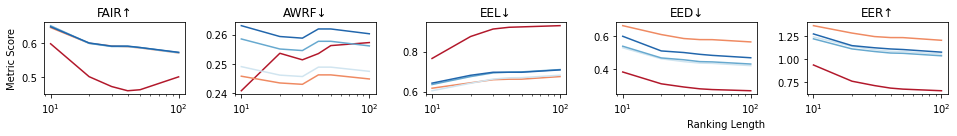

In [18]:
show_rankedsize(ftret_rankedlist_results, 'figures/publish/ftret_rankedsize_gg.pdf')

### Position weight change

In [20]:
ftret_position_results = pd.read_parquet('results/SIGIR22/fair_sensitive_position_up.parquet')
ftret_position_results.head(5)

,system,Metric,value,pos_weight
0,UW_Kt_r0g0c100,AWRF,0.240878,geometric
1,UW_Kt_r25g25c50,AWRF,0.245832,geometric
2,UW_Kt_r60g20c20,AWRF,0.249097,geometric
3,UW_Kt_r80g10c10,AWRF,0.258523,geometric
4,UW_t_bm25,AWRF,0.263063,geometric


<module 'matplotlib.pyplot' from '/home/AMIFARAJ/anaconda3/envs/bookfair/lib/python3.7/site-packages/matplotlib/pyplot.py'>

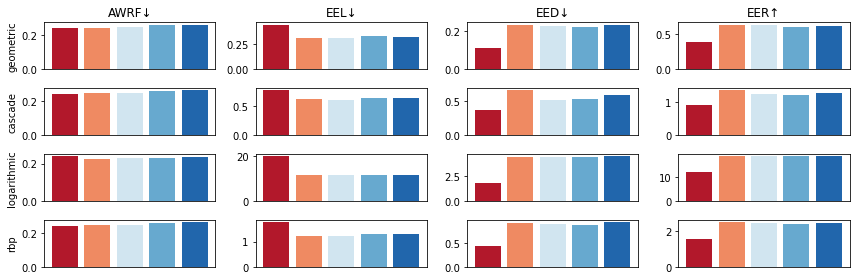

In [21]:
show_pos(ftret_position_results, 'figures/publish/ftret_position.pdf')

### Parameter change

In [22]:
ftret_stop = pd.read_parquet('results/SIGIR22/fairret_sensitivity_stop_up.parquet')
ftret_patience = pd.read_parquet('results/SIGIR22/fairret_sensitivity_patience_up.parquet')

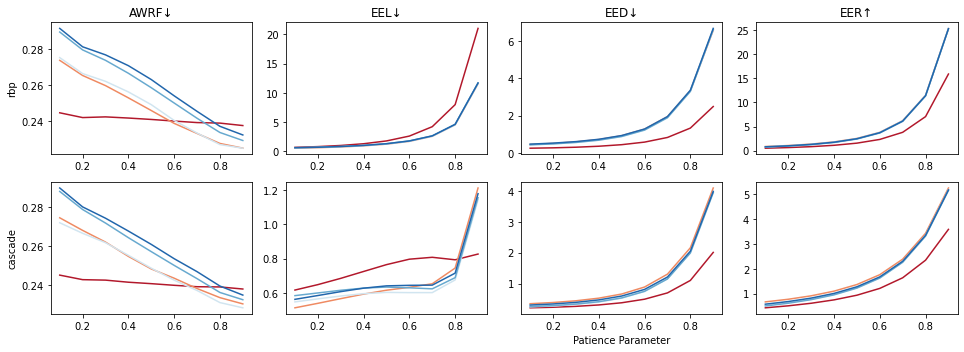

In [24]:
show_parameter(ftret_patience, 'patience', 'Patience Parameter', 'figures/publish/ftret_patience.pdf')

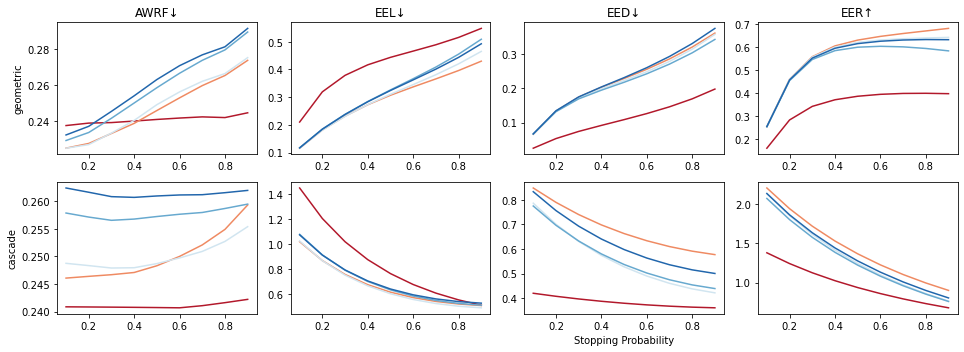

In [25]:
show_parameter(ftret_stop, 'stop', 'Stopping Probability', 'figures/publish/ftret_stop.pdf')